# Accesos a Internet fijo por velocidad de bajada y localidad

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
bajada_localidad = pd.read_csv('../Datasets/AccesosaInternetfijoporvelocidaddebajadaylocalidad.csv')

In [16]:
bajada_localidad.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
bajada_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3095 non-null   object 
 1   Partido     3095 non-null   object 
 2   Localidad   3095 non-null   object 
 3   Link Indec  3095 non-null   object 
 4   Otros       962 non-null    float64
 5   0,256 Mbps  28 non-null     float64
 6   0,375 Mbps  1 non-null      float64
 7   0,5 Mbps    643 non-null    float64
 8   0,512 Mbps  523 non-null    float64
 9   0,625 Mbps  1 non-null      float64
 10  0,75 Mbps   284 non-null    float64
 11  1 Mbps      891 non-null    float64
 12  1,25 Mbps   1 non-null      float64
 13  1,5 Mbps    15 non-null     float64
 14  2 Mbps      722 non-null    float64
 15  2,2 Mbps    1 non-null      float64
 16  2,5 Mbps    4 non-null      float64
 17  3 Mbps      1351 non-null   float64
 18  3,3 Mbps    1 non-null      float64
 19  3,5 Mbps    373 non-null   

Pudimos ver que la cantidad de columnas es bestial e incomóda la visualización y es muy poco practico. Asi que vamos a proceder a organizar las columnas en rangos de 10Mbps asi reducimos la cantidas de columnas considerablemente

Primero reemplazaremos los valores nulos por '0' para que al momento de realizar sumas no nos de error

In [18]:
bajada_localidad = bajada_localidad.fillna(0)

Una vez que tenemos todos los datos numericos procedemos a hacer columnas con rangos

In [19]:
# Seleccionamos las columnas de Mbps
columnas_mbps = bajada_localidad.columns[5:]

# Definimos los rangos de Mbps
rangos_mbps = list(range(0, 91, 10))  # Rangos de 0 a 90 Mbps, cada 10 Mbps

# Creamos nuevas columnas y sumamos por rango
for i in range(len(rangos_mbps) - 1):
    rango_inicio = rangos_mbps[i]
    rango_fin = rangos_mbps[i + 1]
    
    # Creamos nueva columna y sumamos las columnas dentro del rango
    nueva_columna = f'{rango_inicio}-{rango_fin} Mbps'
    columnas_en_rango = [col for col in columnas_mbps if rango_inicio <= int(col.split()[0].split(',')[0]) < rango_fin]
    bajada_localidad[nueva_columna] = bajada_localidad[columnas_en_rango].sum(axis=1)

# Eliminamos las columnas originales de Mbps
bajada_localidad = bajada_localidad.drop(columnas_mbps, axis=1)

In [20]:
bajada_localidad.head()

,Provincia,Partido,Localidad,Link Indec,Otros,0-10 Mbps,10-20 Mbps,20-30 Mbps,30-40 Mbps,40-50 Mbps,50-60 Mbps,60-70 Mbps,70-80 Mbps,80-90 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,744.0,595.965,761.0,96.0,38.0,0.0,0.0,0.0,12.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,46.0,13.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,182.0,10.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,66.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,179.0,1.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
bajada_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3095 non-null   object 
 1   Partido     3095 non-null   object 
 2   Localidad   3095 non-null   object 
 3   Link Indec  3095 non-null   object 
 4   Otros       3095 non-null   float64
 5   0-10 Mbps   3095 non-null   float64
 6   10-20 Mbps  3095 non-null   float64
 7   20-30 Mbps  3095 non-null   float64
 8   30-40 Mbps  3095 non-null   float64
 9   40-50 Mbps  3095 non-null   float64
 10  50-60 Mbps  3095 non-null   float64
 11  60-70 Mbps  3095 non-null   float64
 12  70-80 Mbps  3095 non-null   float64
 13  80-90 Mbps  3095 non-null   float64
dtypes: float64(10), object(4)
memory usage: 338.6+ KB


Ahora podemos ver que el total de columnas quedo reducido a 14 y el Dataframe quedo mucho mas amigable

## GRAFICO

En este primer gráfico el objetivo es visualizar el conteo total de conexiones para diferentes rangos de velocidad de descarga 

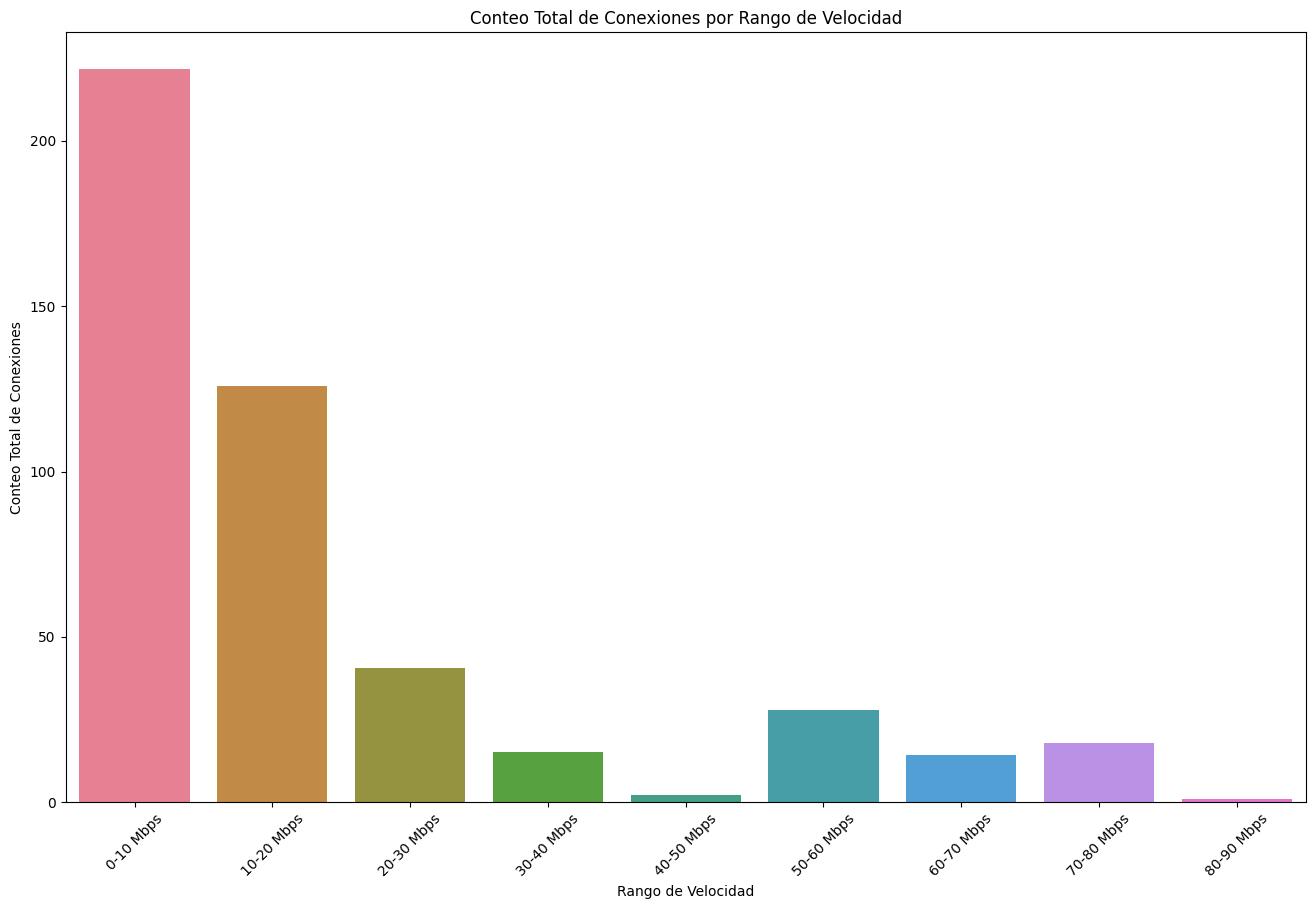

In [22]:
# Seleccionamos las columnas de rango de velocidad
rangos = bajada_localidad.columns[5:]

# Ajustamos el tamaño del gráfico
plt.figure(figsize=(16, 10))

# Utilizamos una paleta de colores distinguibles
sns.set_palette("viridis")

# Creamos el gráfico de barras apiladas para los totales
sns.barplot(data=bajada_localidad[rangos], errorbar=None)

# Agregamos título y etiquetas
plt.title('Conteo Total de Conexiones por Rango de Velocidad')
plt.xlabel('Rango de Velocidad')
plt.ylabel('Conteo Total de Conexiones')

# Rotamos las etiquetas en el eje x para una mejor lectura
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()


------------------------------------------------------------------------------------------------------------------

# Accesos a internet fijo por velocidad de bajada por provincia

------------------------------------------------------------------------------------------------------------------

In [23]:
bajada_provincia = pd.read_csv('../Datasets/AccesosaInternetfijoporvelocidadbajadayprovincia.csv')

In [24]:
bajada_provincia.tail()

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
500,2017.0,4.0,Santa Fe,14.119,- 0,- 0,- 0,3.109,- 0,7.637,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
501,2017.0,4.0,Santiago Del Estero,- 0,- 0,- 0,- 0,41.000,- 0,909,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
502,2017.0,4.0,Tierra Del Fuego,- 0,- 0,- 0,- 0,6.000,- 0,282,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
503,2017.0,4.0,Tucumán,- 0,- 0,- 0,- 0,105.000,- 0,1,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
bajada_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         504 non-null    float64
 1   Trimestre   504 non-null    float64
 2   Provincia   504 non-null    object 
 3   Otros       504 non-null    object 
 4   0,256 Mbps  504 non-null    object 
 5   0,375 Mbps  504 non-null    object 
 6   0,625 Mbps  504 non-null    object 
 7   0,5 Mbps    504 non-null    float64
 8   0,512 Mbps  504 non-null    object 
 9   0,75 Mbps   504 non-null    object 
 10  1 Mbps      504 non-null    object 
 11  1,2 Mbps    504 non-null    object 
 12  1,25 Mbps   504 non-null    object 
 13  1,5 Mbps    504 non-null    object 
 14  2 Mbps      504 non-null    object 
 15  2,2 Mbps    504 non-null    object 
 16  2,5 Mbps    505 non-null    object 
 17  6,7 Mbps    504 non-null    object 
 18  3 Mbps      504 non-null    float64
 19  3,2 Mbps    504 non-null    o

Aqui vemos que tenemos un total de 97 columnas, asi que procederemos a agrupar las columnas que se puedan para poder hacer un analisis mas comodamente

Eliminamos los nulos


In [26]:
bajada_provincia = bajada_provincia.dropna()

reemplazamos los valores '- 0' por '0' asi los podemos tranformar a tipo numerico

In [27]:
bajada_provincia = bajada_provincia.replace('- 0', '0')

Acomodamos las columnas al tipo correcto

In [28]:
bajada_provincia['Año'] = bajada_provincia['Año'].astype(int)
bajada_provincia['Trimestre'] = bajada_provincia['Trimestre'].astype(int)
bajada_provincia[bajada_provincia.columns[3:]] = bajada_provincia[bajada_provincia.columns[3:]].apply(pd.to_numeric, errors='coerce')

In [29]:
bajada_provincia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 503
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         504 non-null    int32  
 1   Trimestre   504 non-null    int32  
 2   Provincia   504 non-null    object 
 3   Otros       504 non-null    float64
 4   0,256 Mbps  504 non-null    int64  
 5   0,375 Mbps  504 non-null    int64  
 6   0,625 Mbps  504 non-null    int64  
 7   0,5 Mbps    504 non-null    float64
 8   0,512 Mbps  504 non-null    int64  
 9   0,75 Mbps   504 non-null    float64
 10  1 Mbps      504 non-null    float64
 11  1,2 Mbps    504 non-null    int64  
 12  1,25 Mbps   504 non-null    int64  
 13  1,5 Mbps    504 non-null    float64
 14  2 Mbps      504 non-null    float64
 15  2,2 Mbps    504 non-null    int64  
 16  2,5 Mbps    504 non-null    float64
 17  6,7 Mbps    504 non-null    int64  
 18  3 Mbps      504 non-null    float64
 19  3,2 Mbps    504 non-null    int64 

Aca abajo podran observar el proceso para agrupar las columnas de mbps en rangos de 10 mbps

In [30]:
# Seleccionamos las columnas de Mbps
columnas_mbps = bajada_provincia.columns[4:]

# Definimos los rangos de Mbps
rangos_mbps = list(range(0, 81, 10))  # Rangos de 0 a 80 Mbps, cada 10 Mbps

# Lista para almacenar los DataFrames de cada rango
dfs_rangos = []

# Creamos nuevas columnas y sumamos por rango
for i in range(len(rangos_mbps) - 1):
    rango_inicio = rangos_mbps[i]
    rango_fin = rangos_mbps[i + 1]
    
    # Creamos nueva columna y sumamos las columnas dentro del rango
    nueva_columna_nombre = f'{rango_inicio}-{rango_fin} Mbps'
    
    if '-' in nueva_columna_nombre:
        # Rango de velocidad, seleccionamos las columnas dentro del rango
        columnas_en_rango = [col for col in columnas_mbps if rango_inicio <= int(col.split()[0].split(',')[0]) < rango_fin]
        suma_rango = bajada_provincia[columnas_en_rango].sum(axis=1)
    else:
        # Valor exacto de velocidad, seleccionamos la columna específica
        suma_rango = bajada_provincia[nueva_columna_nombre]
    
    # Añadimos al DataFrame resultante
    dfs_rangos.append(suma_rango)

# Concatenamos todos los DataFrames en uno solo
bajada_provincia = pd.concat([bajada_provincia] + dfs_rangos, axis=1)

# Eliminamos las columnas originales de Mbps
bajada_provincia = bajada_provincia.drop(columnas_mbps, axis=1)


In [31]:
bajada_provincia.head()

,Año,Trimestre,Provincia,Otros,0,1,2,3,4,5,6,7
0,2022,4,Buenos Aires,97.634,2330.563,999.744,285.702,801.211,790.79,636.798,528.439,96.451
1,2022,4,Capital Federal,106.772,1854.791,99.683,9.992,97.801,122.00,77.732,106.156,43.406
2,2022,4,Catamarca,2.280,1553.551,1154.027,6.717,893.000,0.00,30.388,0.000,0.000
3,2022,4,Chaco,3.909,3412.710,156.845,750.759,2.303,18.00,28.538,0.000,0.000
4,2022,4,Chubut,20.026,2088.103,84.177,8.674,9.658,158.00,17.350,0.000,0.000


Renombramos las columnas con un nombre apropiado

In [32]:
# Creamos un diccionario que mapea los nombres actuales a los nuevos
nuevos_nombres = {
    0: '0-10 Mbps',
    1: '10-20 Mbps',
    2: '20-30 Mbps',
    3: '30-40 Mbps',
    4: '40-50 Mbps',
    5: '50-60 Mbps',
    6: '60-70 Mbps',
    7: '70-80 Mbps'
}

# Aplicamos la función rename al DataFrame
bajada_provincia.rename(columns=nuevos_nombres, inplace=True)

In [33]:
bajada_provincia.head()

,Año,Trimestre,Provincia,Otros,0-10 Mbps,10-20 Mbps,20-30 Mbps,30-40 Mbps,40-50 Mbps,50-60 Mbps,60-70 Mbps,70-80 Mbps
0,2022,4,Buenos Aires,97.634,2330.563,999.744,285.702,801.211,790.79,636.798,528.439,96.451
1,2022,4,Capital Federal,106.772,1854.791,99.683,9.992,97.801,122.00,77.732,106.156,43.406
2,2022,4,Catamarca,2.280,1553.551,1154.027,6.717,893.000,0.00,30.388,0.000,0.000
3,2022,4,Chaco,3.909,3412.710,156.845,750.759,2.303,18.00,28.538,0.000,0.000
4,2022,4,Chubut,20.026,2088.103,84.177,8.674,9.658,158.00,17.350,0.000,0.000


## GRAFICO

Hacemos un grafico que devuelve 'Conteo Total de Conexiones por Rango de Velocidad'

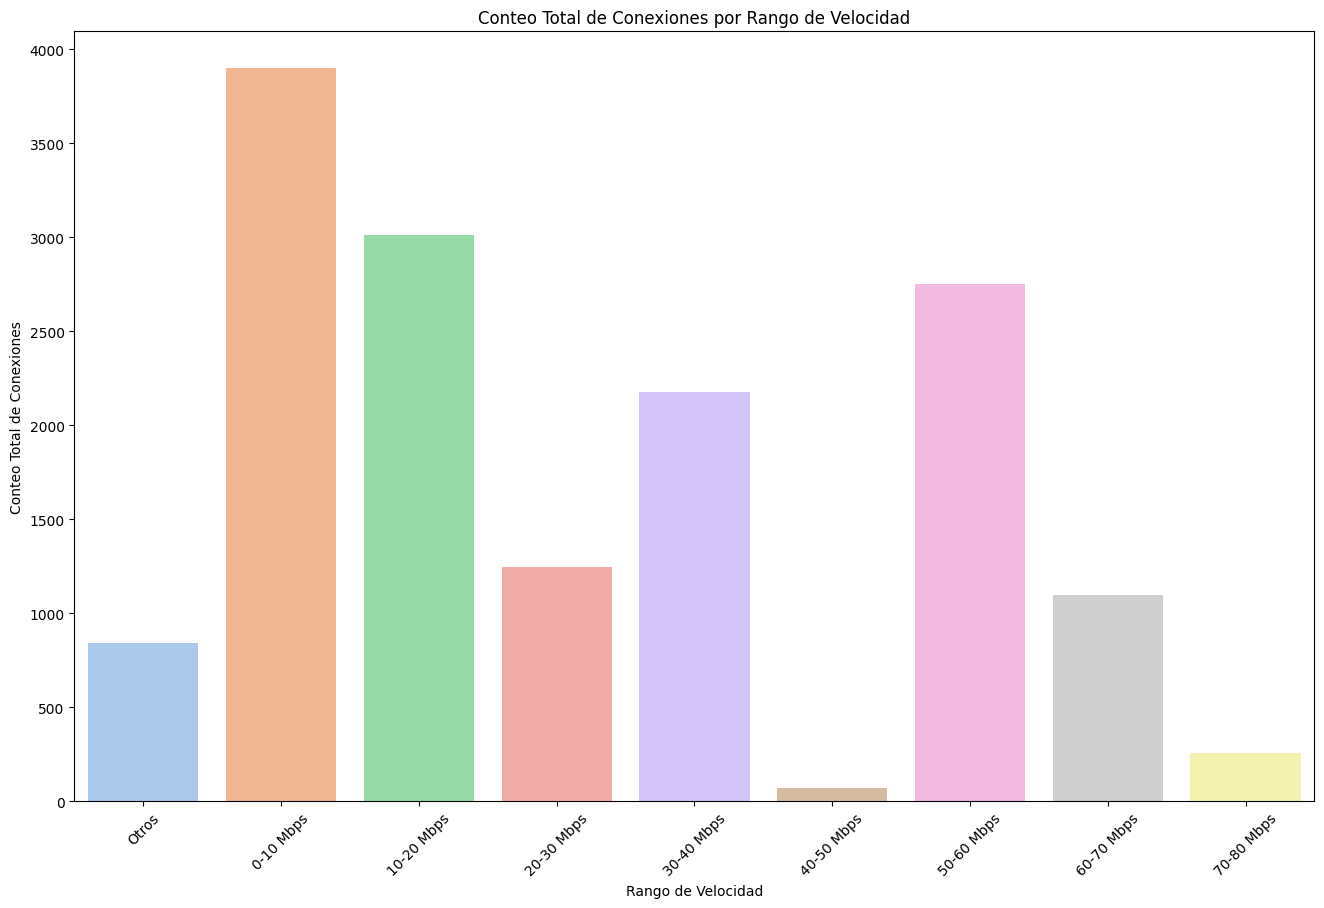

In [34]:
# Seleccionar las columnas de rango de velocidad
rangos = bajada_provincia.columns[3:]

# Ajustar el tamaño del gráfico
plt.figure(figsize=(16, 10))

# Utilizar una paleta de colores distinguibles
sns.set_palette("pastel")

# Crear el gráfico de barras apiladas para los totales
sns.barplot(data=bajada_provincia[rangos], errorbar=None)

# Agregar título y etiquetas
plt.title('Conteo Total de Conexiones por Rango de Velocidad')
plt.xlabel('Rango de Velocidad')
plt.ylabel('Conteo Total de Conexiones')

# Rotar las etiquetas en el eje x
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()
